## Observations and Insights

As we can see the data shows that;

    1) Capomulin and Ramicane have more timepoints than the other drug regimens while also having smaller,
        final tumor volumes compared to other regimens.
    2) The summary statistics for Capomulin showed that it had the lowest numbers in terms of tumor volume across the board
        except for the SEM.
    3) It appears that the tumor volume and the weight of the mouse may contain a correlation with each other. 

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [2]:
merged_table = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [4]:
groupby_drug = merged_table.groupby('Drug Regimen')
tumor_data= groupby_drug['Tumor Volume (mm3)']

In [5]:
tumor_avg = tumor_data.mean()
tumor_median = tumor_data.median()
tumor_var = tumor_data.var()
tumor_std = tumor_data.std()
tumor_sem = tumor_data.sem()
tumor_stats = {"Average":tumor_avg, "Median":tumor_median, "Variance":tumor_var,"Standard Deviation":tumor_std, "SEM":tumor_sem}

In [6]:
summary_table = pd.DataFrame(tumor_stats)
summary_table

,Average,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [7]:
data_points_by_drug = groupby_drug["Timepoint"]
Data_Points = data_points_by_drug.count()

In [8]:
Regimen_df = pd.DataFrame(Data_Points)
Regimen_df

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

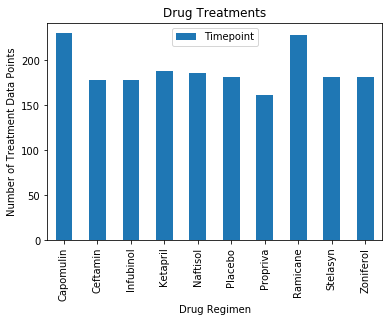

<Figure size 432x288 with 0 Axes>

In [10]:
drug_chart = Regimen_df.plot(kind='bar')
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Number of Treatment Data Points")
drug_chart.set_title("Drug Treatments")
plt.show()
plt.tight_layout()

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

In [12]:
Drug_Names = pd.DataFrame(merged_table["Drug Regimen"].unique(), columns=({"Drug Name"}))
Drug_Names = Drug_Names.sort_values("Drug Name")

Text(0, 0.5, 'Number of Treatment Data Points')

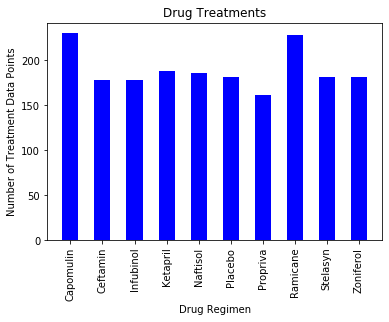

In [13]:
x_axis = np.arange(len(Drug_Names))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, Regimen_df["Timepoint"], width=0.5, color='blue', align="center")
plt.xticks(tick_locations, Drug_Names["Drug Name"], rotation="vertical")

plt.title("Drug Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Treatment Data Points")

## Pie plots

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Pie plot of male percent vs female percent.

In [15]:
merged_table2 = merged_table.copy()
merged_table2 = merged_table2.drop_duplicates(subset='Mouse ID', keep='first')
groupby_gender = merged_table2.groupby("Sex")
gender_df = pd.DataFrame(groupby_gender["Mouse ID"].count())
gender_df = gender_df.rename(columns = {"Mouse ID":"Number of Mice"})
gender_df

,Number of Mice
Sex,
Female,124
Male,125


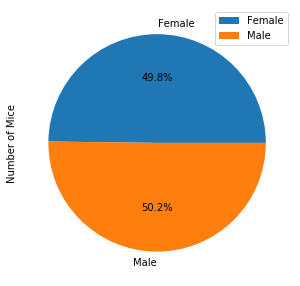

In [16]:
gender_distribution_chart = gender_df.plot.pie(subplots=True, figsize=(5, 5),autopct="%1.1f%%")

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mID_sex = merged_table[["Sex","Mouse ID"]]
mouse_sex_df = mID_sex.drop_duplicates(subset='Mouse ID', keep='first')
m_sex_counts = mouse_sex_df["Sex"].value_counts()

gender_distribution = {"Males": m_sex_counts[0], "Females":m_sex_counts[1]}
gender_distribution

{'Males': 125, 'Females': 124}

(-1.1000791940320744,
 1.1016630746735625,
 -1.1009347297692742,
 1.1017685314144794)

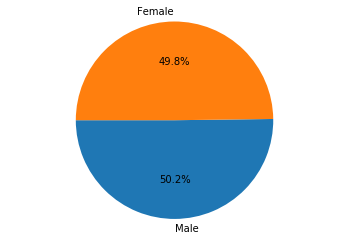

In [18]:
labels = mID_sex['Sex'].unique()
sizes = m_sex_counts
explode = (0, 0)
fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

## Quartiles, outliers and boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Check the insturctions
Capomulin_treatments = merged_table.loc[(merged_table["Drug Regimen"] == "Capomulin")]
groupby_mouse = Capomulin_treatments.groupby("Mouse ID")
Capomulin_tumor = groupby_mouse["Tumor Volume (mm3)"].last()
Capomulin_tumor_df = pd.DataFrame(Capomulin_tumor)

Capomulin_tumor_df

,Tumor Volume (mm3)
Mouse ID,
b128,38.982878
b742,38.939633
f966,30.485985
g288,37.074024
g316,40.159220
i557,47.685963
i738,37.311846
j119,38.125164
j246,38.753265


In [20]:
Ramicane_treatments = merged_table.loc[(merged_table["Drug Regimen"] == "Ramicane")]
groupby_mouse = Ramicane_treatments.groupby("Mouse ID")
Ramicane_tumor = groupby_mouse["Tumor Volume (mm3)"].last()
Ramicane_tumor_df = pd.DataFrame(Ramicane_tumor)
Ramicane_tumor_df

,Tumor Volume (mm3)
Mouse ID,
a411,38.407618
a444,43.047543
a520,38.810366
a644,32.978522
c458,38.342008
c758,33.397653
d251,37.311236
e662,40.659006
g791,29.128472


In [21]:
Infubinol_treatments = merged_table.loc[(merged_table["Drug Regimen"] == "Infubinol")]
groupby_mouse = Infubinol_treatments.groupby("Mouse ID")
Infubinol_tumor = groupby_mouse["Tumor Volume (mm3)"].last()
Infubinol_tumor_df = pd.DataFrame(Infubinol_tumor)
Infubinol_tumor_df

,Tumor Volume (mm3)
Mouse ID,
a203,67.973419
a251,65.525743
a577,57.031862
a685,66.083066
c139,72.226731
c326,36.321346
c895,60.969711
e476,62.435404
f345,60.918767


In [22]:
Ceftamin_treatments = merged_table.loc[(merged_table["Drug Regimen"] == "Ceftamin")]
groupby_mouse = Ceftamin_treatments.groupby("Mouse ID")
Ceftamin_tumor = groupby_mouse["Tumor Volume (mm3)"].last()
Ceftamin_tumor_df = pd.DataFrame(Ceftamin_tumor)
Ceftamin_tumor_df

,Tumor Volume (mm3)
Mouse ID,
a275,62.999356
b447,45.000000
b487,56.057749
b759,55.742829
f436,48.722078
h531,47.784682
j296,61.849023
k210,68.923185
l471,67.748662


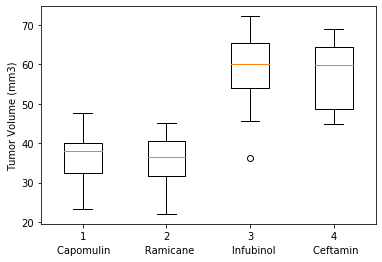

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin_tumors = Capomulin_tumor_df['Tumor Volume (mm3)']
Ramicane_tumors = Ramicane_tumor_df['Tumor Volume (mm3)']
Infubinol_tumors = Infubinol_tumor_df['Tumor Volume (mm3)']
Ceftamin_tumors = Ceftamin_tumor_df['Tumor Volume (mm3)']

names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
data = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]

fig, ax = plt.subplots()
ax.set_xlabel("Capomulin           Ramicane            Infubinol            Ceftamin")
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(data)

plt.show()


## Line and scatter plots

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
b128_treatments = merged_table.loc[(merged_table["Mouse ID"] == "b128")]
b128_treatments

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


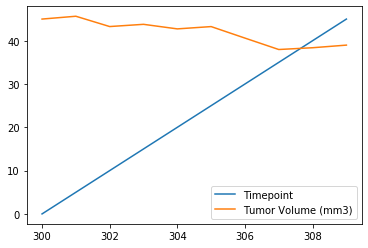

In [25]:
line_data = b128_treatments[["Timepoint","Tumor Volume (mm3)"]]
line_data.plot()

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

groupby_mouse = Capomulin_treatments.groupby("Mouse ID")
average_tumor_volume = groupby_mouse["Tumor Volume (mm3)"].mean()
mouse_weight = groupby_mouse["Weight (g)"].unique()

tumor_v_weight_df = pd.merge(average_tumor_volume, mouse_weight, on="Mouse ID")

tumor_v_weight_df = pd.DataFrame(tumor_v_weight_df)
tumor_v_weight_df["Weight (g)"]= tumor_v_weight_df["Weight (g)"].astype(float)

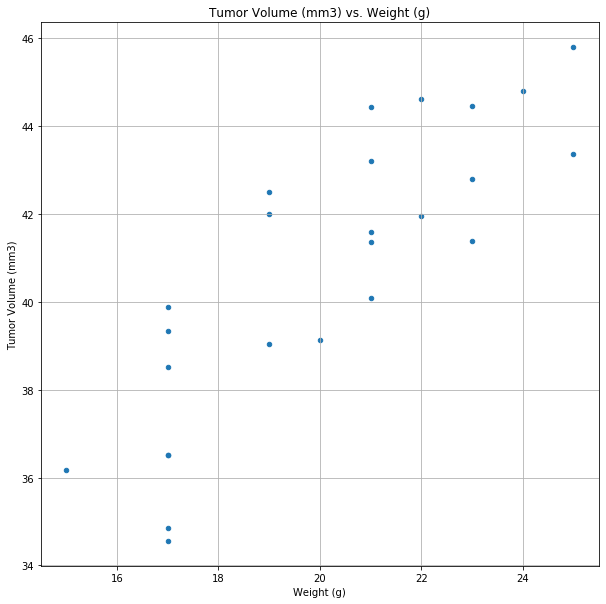

In [27]:
tumor_v_weight_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(10,10),
              title="Tumor Volume (mm3) vs. Weight (g)")

plt.show()

In [28]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
tumor_vol = tumor_v_weight_df["Tumor Volume (mm3)"]
weight = tumor_v_weight_df[("Weight (g)")]
correlation = st.pearsonr(weight, tumor_vol)


Correlation coefficient is (0.8419363424694717, 1.322572243471279e-07)


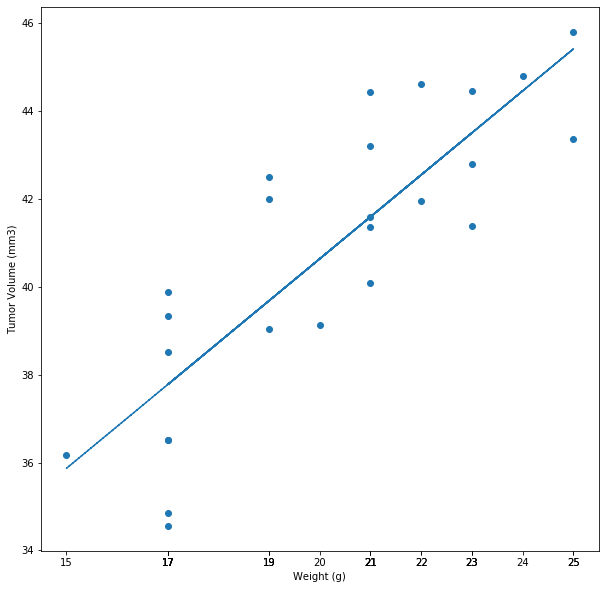

In [29]:
print(f"Correlation coefficient is {correlation}")

# Linear Regression:
TvW_slope, TvW_int, TvW_r, TvW_p, TvW_std_err = st.linregress(weight, tumor_vol)


# Equation of line to calculate predicted violent crime rate

TvW_fit = TvW_slope * weight + TvW_int


plt.figure(figsize=(10,10))
plt.scatter(weight, tumor_vol)
plt.plot(weight,TvW_fit,"--")
plt.xticks(weight, rotation=0)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()